In [1]:
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
from scipy import special
import math

#libraries for reading csv
import csv
import pandas as pd

In [2]:


def plotting(xlabel, ylabel, title = None, grid = True, legend = False, yscale = None, axfsize = 14, legendfsize = 14):
    plt.xlabel(xlabel, fontsize = axfsize)
    plt.ylabel(ylabel, fontsize = axfsize)
    plt.title(title)
    if yscale: plt.yscale(yscale)
    if grid: plt.grid(alpha =0.2)  
    if legend: plt.legend(fontsize = legendfsize)     


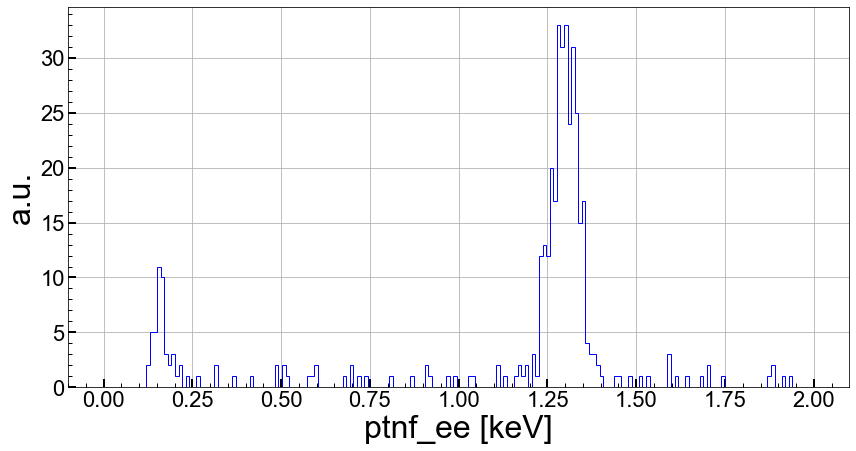

In [3]:
datarelease = np.append(np.loadtxt('data/event_EnergykeVee_Per1.txt'),np.loadtxt('data/event_EnergykeVee_Per2.txt'), axis = 0)

plt.figure(figsize= (14,7))
plt.hist(datarelease, histtype = 'step', color = 'blue', bins = np.linspace(0, 2 , 200))
plt.xlabel('ptnf_ee [keV]'); plt.ylabel('a.u.'); plt.grid()
plt.show()

